In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
from plots import *

%matplotlib inline

%reload_ext autoreload
%autoreload 2

c:\Users\Bruker\anaconda3\envs\4D_CT\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
# golden = ((np.sqrt(5) + 1) / 2 * 360 )% 360
# golden = np.min([golden, np.abs(360-golden)])

theta_rev = lambda n, p: (n * 360/p / ((np.sqrt(5) + 1) / 2)) % (360/p)

nprojs = 13
increment = 360 / nprojs

angles = np.zeros((4,nprojs))
# starts = golden * np.arange(0,10) % increment
starts = theta_rev(np.arange(0,4), nprojs)

print(starts)

for i, start_p in enumerate(starts):
    ct_angles = np.arange(start_p, 360, increment)
    angles[i, :] = ct_angles


# print(starts)
# angles = np.reshape(angles, -1)

print(angles)
angles = angles * np.pi / 180

[ 0.         17.11478738  6.53726707 23.65205445]
[[  0.          27.69230769  55.38461538  83.07692308 110.76923077
  138.46153846 166.15384615 193.84615385 221.53846154 249.23076923
  276.92307692 304.61538462 332.30769231]
 [ 17.11478738  44.80709507  72.49940277 100.19171046 127.88401815
  155.57632584 183.26863353 210.96094123 238.65324892 266.34555661
  294.0378643  321.730172   349.42247969]
 [  6.53726707  34.22957476  61.92188245  89.61419015 117.30649784
  144.99880553 172.69111322 200.38342092 228.07572861 255.7680363
  283.46034399 311.15265168 338.84495938]
 [ 23.65205445  51.34436214  79.03666983 106.72897753 134.42128522
  162.11359291 189.8059006  217.4982083  245.19051599 272.88282368
  300.57513137 328.26743907 355.95974676]]


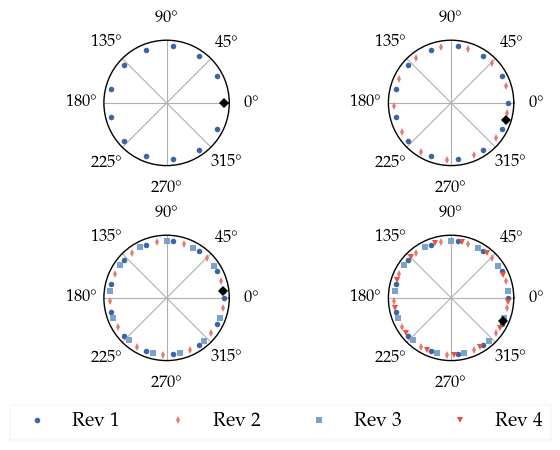

In [65]:
choose_formatter(False)
fig, ax = plt.subplots(2,2, figsize=(DEFAULT_FIGSIZE[0], DEFAULT_FIGSIZE[1]), subplot_kw = {"projection" : "polar"})
ax = ax.flatten()
markers = ["o", "d", "s", "v"]


for i, data in enumerate(angles):
    for j in range(i+1):
        ax[i].plot(angles[j], np.ones_like(data), markers[j], markersize=4, label=f"Rev {i+1}" )
    # ax[i].plot(data, np.ones_like(data), "o")
    ax[i].set_rticks([])
    ax[i].set_rlim(0,1.1)
    if i%2 == 0:
        ax[i].plot(angles[i, 0], 1, "D", markersize=5, color="black")
    else:
        ax[i].plot(2*np.pi-angles[i, 0], 1, "D", markersize=5, color="black")
    # ax[i].set_title(f"Starting angle: {starts[i]:.2f}")
handles = [fig.get_axes()[k].get_legend_handles_labels()[0] for k in range(4)]
labels = [fig.get_axes()[m].get_legend_handles_labels()[1] for m in range(4)]
handles = [handles[i][-1] for i in range(4)]
labels= [labels[i][-1] for i in range(4)]
fig.legend( handles=handles, labels=labels, bbox_to_anchor=(0.45, -0.0), loc="upper center",
            ncol=4, fancybox=True, shadow=False)
plt.savefig(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting\Illustrations\Golden_Angle_V3_Illustration.pdf", format="pdf", bbox_inches="tight")
plt.show()
    